In [ ]:
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# model restore
sess=tf.Session()
saver = tf.train.import_meta_graph('./model/model.ckpt-100.meta')
saver.restore(sess, tf.train.latest_checkpoint('./model/'))

In [ ]:
# get the default graph
graph = tf.get_default_graph()

In [ ]:
# print the operations current graph has.
# can access the tensor of the restored model by this name + ':0'
for op in graph.get_operations():
    print(op.name)

In [ ]:
# train test set load
vols = sio.loadmat('./sensorimotor_4D_sample.mat')
X_train, X_test, y_train, y_test = vols['X_train'], vols['X_test'], vols['y_train'], vols['y_test']
x_mean = np.mean(X_train)
x_std = np.std(X_train)
X_tr_centered = (X_train - x_mean)/x_std
X_ts_centered = (X_test - x_mean)/x_std

In [ ]:
X_tr_centered.shape,  X_ts_centered.shape

((1320, 53, 63, 46), (120, 53, 63, 46))

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape,  y_test.shape

((1320,), (120,))

In [ ]:
# placeholder load
tf_x = graph.get_tensor_by_name("tf_x:0") # shape:(none,53,63,46)
is_train = graph.get_tensor_by_name("is_train:0")

In [ ]:
# get the dense layer tensor
output_tensor = graph.get_tensor_by_name('dense_1/Sigmoid:0')

In [ ]:
# 26th volume of the test set
i = 26
input_image = X_ts_centered[i,:]
output_index = int(y_test[i])

# define the calculation
cal = tf.gradients(output_tensor[0][output_index],tf_x)[0]

# expand dimension of the input image fit to the placeholder 'tf_x'
x_value = np.expand_dims(input_image, axis=0)

# get the gradients
gradients = sess.run(cal, {tf_x:x_value,is_train:False})

# to absolute value
tp = gradients.squeeze()
tp = np.absolute(tp)

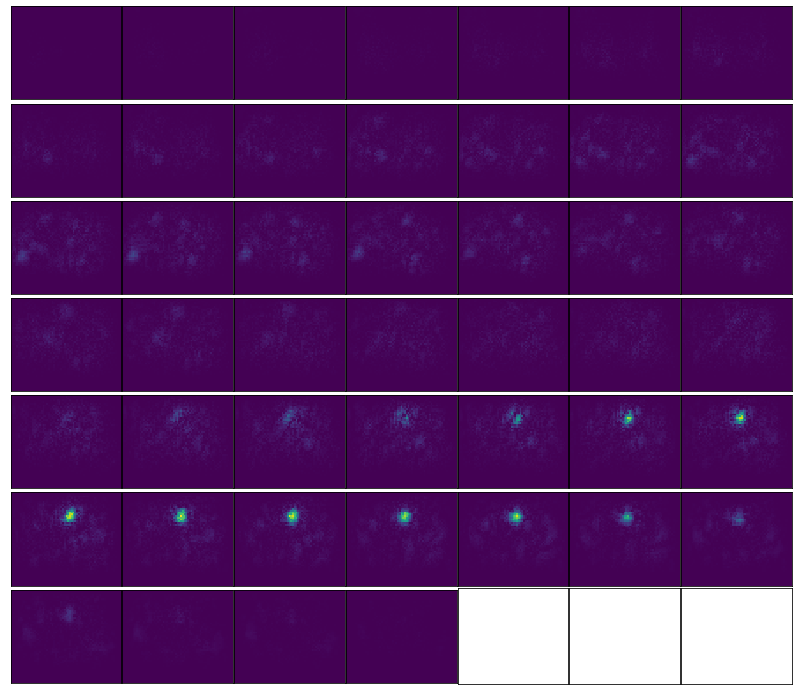

In [ ]:
# saliency map with same color scale
f,axes= plt.subplots(7,7, figsize=(14,12.5),subplot_kw={'xticks': [], 'yticks': []})
f.subplots_adjust(hspace=0.01, wspace=0.01)
ax = axes.flat
for i in range(46):
    ax[i].imshow(tp[:,:,i],vmin=tp.min(),vmax=tp.max())

## Maximum across 46 channels

In [ ]:
# leave only maximum magnitude across 46 channels
tp2=np.amax(tp, axis=2)

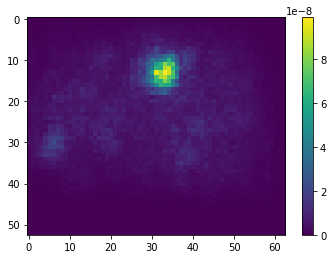

In [ ]:
plt.imshow(tp2) # matplotlib default color map
plt.colorbar()

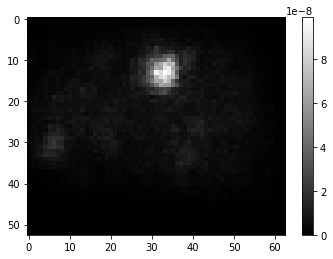

In [ ]:
plt.imshow(tp2,cmap='gray') # gray color map
plt.colorbar()